In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### 노선 이용량을 활용성 지수로 변환
* 이용량 결측치 처리 과정에서 더 정확하게 분석하고 시각화한 후 예측
* 예측 성능 검증 진행

In [51]:
weight_data = pd.read_csv("../data/weight_data.csv")

In [52]:
weight_data.columns

Index(['city_name', 'routeno', 'routetp', 'startnodenm', 'endnodenm',
       'startvehicletime', 'endvehicletime', 'intervaltime', 'intervalsattime',
       'intervalsuntime', 'usage', '노선정류장수', '노선거리(km)', '굴곡도', 'start', 'end',
       'total_operating_time', 'interval_avg', 'num_bus', '총인구수', '노인(수)',
       '인구_대비_정류장수'],
      dtype='object')

In [53]:
weight_data[['city_name', "usage", '노선정류장수', '노선거리(km)', '굴곡도', 'total_operating_time', 'interval_avg', 'num_bus', '총인구수', '노인(수)', '인구_대비_정류장수']]

,city_name,usage,노선정류장수,노선거리(km),굴곡도,total_operating_time,interval_avg,num_bus,총인구수,노인(수),인구_대비_정류장수
0,창원시,33931.0,105.0,55.900000,2.0,990.000000,40.000000,24,1003731.0,276574.0,9559.342857
1,창원시,2558.0,83.0,53.500000,1.7,865.000000,170.000000,5,1003731.0,276574.0,12093.144578
2,창원시,299.0,74.0,43.800000,2.6,545.000000,220.000000,2,1003731.0,276574.0,13563.932432
3,창원시,63612.0,35.0,21.100000,1.0,1010.000000,12.142857,83,1003731.0,276574.0,28678.028571
4,창원시,68306.0,39.0,8.800000,1.8,1000.000000,17.000000,58,1003731.0,276574.0,25736.692308
...,...,...,...,...,...,...,...,...,...,...,...
2508,합천군,2132.0,27.0,29.863889,2.0,405.855659,124.728571,3,40756.0,23160.0,1509.481481
2509,합천군,2132.0,27.0,29.863889,2.0,405.855659,124.728571,3,40756.0,23160.0,1509.481481
2510,합천군,45.0,29.0,25.300000,1.3,405.855659,124.728571,3,40756.0,23160.0,1405.379310
2511,합천군,2132.0,27.0,29.863889,2.0,405.855659,124.728571,3,40756.0,23160.0,1509.481481


In [56]:
weight_data[weight_data["city_name"] == "창원시"][["usage"]]

# weight_data["이용량/인구수"] = weight_data['usage'] / weight_data["총인구수"]
# weight_data["이용량/인구수"]

0      33931.0
1       2558.0
2        299.0
3      63612.0
4      68306.0
        ...   
159      549.0
160      549.0
161    63484.0
162    13562.0
163    96263.0
Name: usage, Length: 164, dtype: float64

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
usage_index = pd.DataFrame(scaler.fit_transform(weight_data[weight_data["city_name"] == "사천시"][["usage"]]))

In [64]:
usage_index.describe()

,0
count,60.000000
mean,0.079058
std,0.151265
min,0.000000
25%,0.015296
50%,0.032198
75%,0.067834
max,1.000000


In [65]:
usage_index.sort_values(by=0, ascending=False).head(30)

,0
3,1.000000
43,0.402442
8,0.383740
29,0.319923
30,0.283869
22,0.275386
27,0.181748
4,0.145951
11,0.130848
58,0.098650


<Axes: ylabel='Density'>

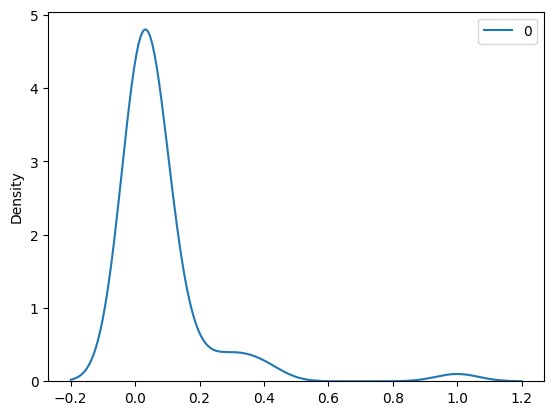

In [66]:
import seaborn as sns

sns.kdeplot(usage_index)